# Chatbook LLM cells

Anton Antonov   
["Jupyter::Chatbook" Raku package at GitHub](https://github.com/antononcube/Raku-Jupyter-Chatbook)   
August 2023

------

## Introduction

In this notebook we show how the Large Language Models (LLMs) of OpenAI (ChatGPT) and Google (PaLM) can be interacted with using notebook cells.

**Remark:** The chatbook LLM cells use the packages ["WWW::OpenAI"](https://raku.land/zef:antononcube/WWW::OpenAI), [AAp2], and ["WWW::PaLM"](https://raku.land/zef:antononcube/WWW::PaLM), [AAp3].

**Remark:** The API keys for the LLM cells are taken from the Operating System (OS) environmental variables `OPENAI_API_KEY` and `PALM_API_KEY`.


**Remark:** The results of the LLM cells are automatically copied to the clipboard. (Currently enabled on macOS only.)



-----

## OpenAI

In this section we show examples of accessing OpenAI's text completion using both normal code cells and dedicated OpenAI cells.

Here is an example programmatic ("manual") access:

In [ ]:
use WWW::OpenAI;

openai-completion('How many people live in EU?', max-tokens=> 120, format =>'values')

Accessing OpenAI "directly" with an LLM cell with the magic spec `%% openai`:

In [2]:
#% openai
Randomly generate 3 dog names and 4 cat names.



Dog Names:
1. Barkley
2. Daisy
3. Spot

Cat Names:
1. Fluffy
2. Paws
3. Simba
4. Shadow

Here we put parameters on cell's magic line, that specify to get `3` results with text generation temperature `0.9`, using the model "gpt-3.5-turbo":

In [1]:
#% openai , n = 3 , temperature = 0.9 , model = 'gpt-3.5-turbo'
Randomly generate 2 dog names.

1. Luna
2. Max
1. Coco
2. Baxter
1. Luna
2. Max

**Remark:** For the full list of parameters that can be used in cell's magic line see the signature of `openai-completion` (and documentation) of ["WWW::OpenAI"](https://raku.land/zef:antononcube/WWW::OpenAI), [AAp2].

-------

## PaLM

Programmatic access of PaLM:

In [16]:
use WWW::PaLM;
use Text::Utils :ALL;

'Generate a scray story about a little girl going to a forest and getting possesed by another dead girl.' 
==> palm-generate-text(format => 'values') 
==> wrap-paragraph() 
==> join("\n")

Once upon a time, there was a little girl named Lily who lived in a small
village on the edge of a dark and mysterious forest. Lily was a curious and
adventurous girl, and she loved to explore the forest. One day, Lily decided
to go for a walk in the forest by herself. She walked for a

Direct PaLM access:

In [4]:
#% palm
Generate a scray story about a little girl going to a forest, eating some strange mushrooms because she starved, and becoming a giant walking tree. 

10-year-old Lily loved to play in the forest near her house. She would spend hours running through the trees, climbing up rocks, and playing hide-and-seek with her friends. One day, Lily was playing in the forest when she got lost. She wandered around for hours, trying to find her way back home, but she only got more and more lost.

As night fell, Lily started to get scared. She was all alone in the dark forest, and she didn't know what to do. She huddled under a tree, trying to stay warm, but she couldn't stop shivering.

In the morning, Lily woke up to the sound of birds chirping. She stood up and stretched, then started walking again. She didn't know where she was going, but she knew she had to keep moving.

Lily walked for hours, but she didn't see anyone. She was starting to lose hope when she came across a clearing. In the middle of the clearing was a large tree.

Lily walked up to the tree and looked at it. The tree was covered in strange mushrooms. Lily had never seen mushrooms

Here is an example of an LLM cell with additional parameters in the magic spec line:

In [5]:
%% palm, max-tokens=30, format='json'
Generate a story about talking cars. No longer than 20 words. 

{
  "candidates": [
    {
      "safetyRatings": [
        {
          "category": "HARM_CATEGORY_DEROGATORY",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_TOXICITY",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_VIOLENCE",
          "probability": "NEGLIGIBLE"
        },
        {
          "category": "HARM_CATEGORY_SEXUAL",
          "probability": "NEGLIGIBLE"
        },
        {
          "probability": "NEGLIGIBLE",
          "category": "HARM_CATEGORY_MEDICAL"
        },
        {
          "probability": "NEGLIGIBLE",
          "category": "HARM_CATEGORY_DANGEROUS"
        }
      ],
      "output": "A talking car told a police car, \"I am innocent, officer!\""
    }
  ]
}

**Remark:** For the full list of parameters that can be used in cell's magic line see the signature of `palm-generate-text` (and documentation) of ["WWW::PaLM"](https://raku.land/zef:antononcube/WWW::PaLM), [AAp3].

-----

##  DALL・E

In this section we demonstrate image generation using DALL・E.

Here is an example of programmatic access:

In [7]:
use WWW::OpenAI;
use Text::Plot;

my @imgResB64 = |openai-create-image(
        "racoon with a sliced onion in the style of Raphael",
        n => 2,
        size => 'small',
        response-format => 'b64_json',
        format => 'values',
        method => 'tiny');

@imgResB64.elems

2


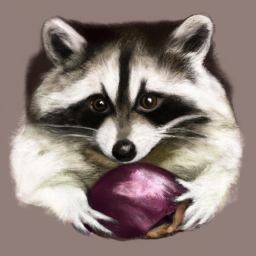
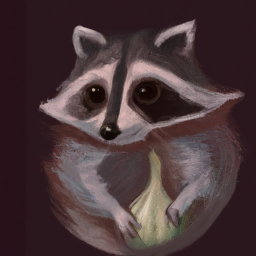

In [9]:
@imgResB64.map({ from-base64($_) }).join("\n\n")

Image generation with a DALL・E cell:


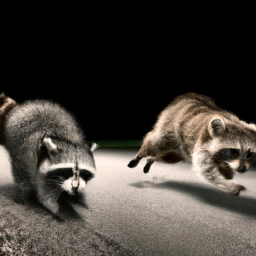

In [8]:
%%dalle
Raccoons chase in the style of Helmut Newton.

Here we specify the generation of multiple images:


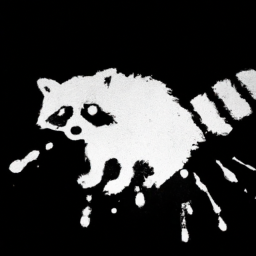
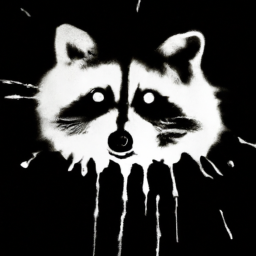
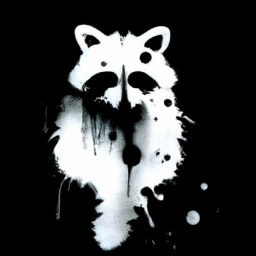
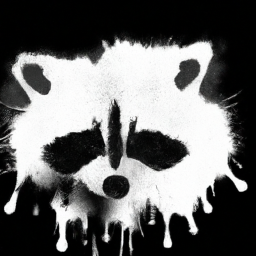
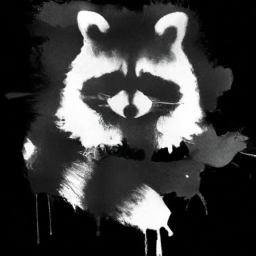

In [17]:
#% dalle, size=small, n = 5
Generate raccoon inkblot with white ink on black canvas.

-----

## References

### Articles

[AA1] Anton Antonov,
["Workflows with LLM functions"](https://rakuforprediction.wordpress.com/2023/08/01/workflows-with-llm-functions/),
(2023),
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).


### Packages

[AAp1] Anton Antonov,
[LLM::Functions Raku package](https://github.com/antononcube/Raku-LLM-Functions),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[AAp2] Anton Antonov,
[WWW::OpenAI Raku package](https://github.com/antononcube/Raku-WWW-OpenAI),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[AAp3] Anton Antonov,
[WWW::PaLM Raku package](https://github.com/antononcube/Raku-WWW-PaLM),
(2023),
[GitHub/antononcube](https://github.com/antononcube).
